# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Gi-E Thang

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [3]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

X, y = load_concrete()



### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Instantiate the models
decision_tree = DecisionTreeRegressor(max_depth=5, random_state=0)
random_forest = RandomForestRegressor(max_depth=5, random_state=0)
gradient_boosting = GradientBoostingRegressor(max_depth=5, random_state=0)

# Fit the models with the data
decision_tree.fit(X, y)
random_forest.fit(X, y)
gradient_boosting.fit(X, y)

from sklearn.model_selection import cross_validate

# Perform cross-validation for each model
dt_scores = cross_validate(decision_tree, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
rf_scores = cross_validate(random_forest, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
gb_scores = cross_validate(gradient_boosting, X, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

# Calculate the average training and validation accuracy
dt_avg_train_mse = -np.mean(dt_scores['train_score'])
dt_avg_val_mse = -np.mean(dt_scores['test_score'])
rf_avg_train_mse = -np.mean(rf_scores['train_score'])
rf_avg_val_mse = -np.mean(rf_scores['test_score'])
gb_avg_train_mse = -np.mean(gb_scores['train_score'])
gb_avg_val_mse = -np.mean(gb_scores['test_score'])

# Create a pandas DataFrame for results
results = pd.DataFrame({
    'Training Accuracy': [dt_avg_train_mse, rf_avg_train_mse, gb_avg_train_mse],
    'Validation Accuracy': [dt_avg_val_mse, rf_avg_val_mse, gb_avg_val_mse]
}, index=['DT', 'RF', 'GB'])

# Print the results
print(results)


    Training Accuracy  Validation Accuracy
DT          47.918561           163.087775
RF          32.056464           156.251425
GB           3.739270            99.224576


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [5]:
from sklearn.metrics import make_scorer, r2_score

# Create a custom scorer for R2 score since it's not available directly in cross_validate
r2_scorer = make_scorer(r2_score)

# Perform cross-validation for each model with R2 score
dt_scores = cross_validate(decision_tree, X, y, scoring=r2_scorer, cv=5, return_train_score=True)
rf_scores = cross_validate(random_forest, X, y, scoring=r2_scorer, cv=5, return_train_score=True)
gb_scores = cross_validate(gradient_boosting, X, y, scoring=r2_scorer, cv=5, return_train_score=True)

# Calculate the average training and validation R2 score
dt_avg_train_r2 = np.mean(dt_scores['train_score'])
dt_avg_val_r2 = np.mean(dt_scores['test_score'])
rf_avg_train_r2 = np.mean(rf_scores['train_score'])
rf_avg_val_r2 = np.mean(rf_scores['test_score'])
gb_avg_train_r2 = np.mean(gb_scores['train_score'])
gb_avg_val_r2 = np.mean(gb_scores['test_score'])

# Create a pandas DataFrame for results with R2 score
results_r2 = pd.DataFrame({
    'Training R2 Score': [dt_avg_train_r2, rf_avg_train_r2, gb_avg_train_r2],
    'Validation R2 Score': [dt_avg_val_r2, rf_avg_val_r2, gb_avg_val_r2]
}, index=['DT', 'RF', 'GB'])

# Print the results with R2 score
print(results_r2)


    Training R2 Score  Validation R2 Score
DT           0.822887             0.176210
RF           0.881218             0.174781
GB           0.986436             0.474425


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1.
Results from Previous Assignment (Linear Models):

Alpha = 0.001: Validation R2 score = 0.62
Alpha = 0.01: Validation R2 score = 0.62
Alpha = 0.1: Validation R2 score = 0.62
Alpha = 1: Validation R2 score = 0.62
Alpha = 10: Validation R2 score = 0.62

Results from Current Assignment (Tree-Based Models):

Decision Tree:
Validation R2 score: 0.176210
Random Forest:
Validation R2 score: 0.174781
Gradient Boosting:
Validation R2 score: 0.474425
The R2 scores for the tree-based models in the current assignment are significantly lower than the validation R2 scores for the linear models in the previous assignment. This indicates that, in terms of R2 score, the linear models performed better on the validation dataset.

2.

In the context of the "Concrete" dataset and considering the nature of concrete compressive strength prediction, I will consider using Random Forest. It offers a balance between interpretability and predictive accuracy, which is often desirable in practical applications. If the dataset is particularly complex and you need even higher accuracy, I would use Gradient Boosting.

3.

a. Hyperparameter Tuning: Optimize the hyperparameters of the tree-based models. For example, adjust the max_depth, n_estimators (in the case of Random Forest), and learning rate (in the case of Gradient Boosting). Grid search or random search can help identify the optimal hyperparameters.

b.Interaction Features: Explore interactions between features. Create interaction terms that combine two or more features, which can help the model capture complex relationships.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. 
The code was not generated by AI but from stratch.
Here are the processes used to create the code:

Data Source: The data is sourced from the Yellowbrick library's "load_concrete" function. This function loads the "Concrete" dataset.

Import Libraries: The code imports the necessary Python libraries, including numpy, pandas, matplotlib, and seaborn, to handle data and create visualizations.

Machine Learning Models: The code imports machine learning models (Decision Tree, Random Forest, and Gradient Boosting) from scikit-learn and instantiates these models with specified hyperparameters.

Model Training and Validation: The code uses cross-validation to train and validate the models. It calculates the average training and validation R2 scores for each model. This step also involves using the "r2_score" metric for scoring the models.

Results Visualization: The code creates a pandas DataFrame to organize and display the results, including training and validation R2 scores for each model.

There were no significant challenges in creating this code since it's a standard workflow for training and evaluating machine learning models. 

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [53]:
# TO DO: Import wine dataset
# Define the column headers


# Define the URL for the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Define column headers for the dataset
column_names = [
    'Class',
    'Alcohol',
    'Malic_Acid',
    'Ash',
    'Alcalinity_of_Ash',
    'Magnesium',
    'Total_Phenols',
    'Flavanoids',
    'Nonflavanoid_Phenols',
    'Proanthocyanins',
    'Color_Intensity',
    'Hue',
    'OD280_OD315_of_Diluted_Wines',
    'Proline'
]

# Load the dataset into a pandas DataFrame
wine_data = pd.read_csv(url, header=None, names=column_names)

# Split the dataset into feature matrix X and target vector y
X = wine_data.drop('Class', axis=1)  # 'Class' column is the target, so we drop it
y = wine_data['Class']

# Print the size and type of X and y
print("Size and type of X:")
print(X.shape, type(X))
print("\nSize and type of y:")
print(y.shape, type(y))


Size and type of X:
(178, 13) <class 'pandas.core.frame.DataFrame'>

Size and type of y:
(178,) <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [54]:
# TO DO: ADD YOUR CODE HERE
print(wine_data.head(5))


   Class  Alcohol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_Intensity   Hue  OD280_OD315_of_Diluted_Wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [56]:
# TO DO: ADD YOUR CODE HERE
missing_values = wine_data.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])
wine_data = wine_data.fillna(wine_data.mean())

Columns with missing values:
Series([], dtype: int64)


How many samples do we have of each type of wine?

In [57]:
# TO DO: ADD YOUR CODE HERE
wine_class_counts = wine_data['Class'].value_counts()

# Print the counts for each type of wine
print("Number of samples for each type of wine:")
print(wine_class_counts)

Number of samples for each type of wine:
Class
2    71
1    59
3    48
Name: count, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [59]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Initialize random state
random_state = 0

# Create a list of different random states for the loop
random_states = [0, 1, 2, 3, 4]

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=["Data Size", "Model", "Training Accuracy", "Validation Accuracy"])

# Loop through different random states and store results
for state in random_states:
    # Split the data into training and validation sets
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=state)

    # Initialize the models
    svc_model = SVC()
    dt_model = DecisionTreeClassifier(max_depth=3, random_state=state)

    # Cross-validate the SVC model
    svc_scores = cross_validate(svc_model, X_train, y_train, scoring='accuracy', cv=5, return_train_score=True)

    # Cross-validate the Decision Tree model
    dt_scores = cross_validate(dt_model, X_train, y_train, scoring='accuracy', cv=5, return_train_score=True)

    # Store the results in the DataFrame
    results = pd.concat([results, pd.DataFrame({
        "Data Size": [X_train.shape[0], X_train.shape[0]],
        "Model": ["SVC", "Decision Tree"],
        "Training Accuracy": [svc_scores['train_score'].mean(), dt_scores['train_score'].mean()],
        "Validation Accuracy": [svc_scores['test_score'].mean(), dt_scores['test_score'].mean()]
    })], ignore_index=True)

# Print the results DataFrame
print(results)






  Data Size          Model  Training Accuracy  Validation Accuracy
0       142            SVC           0.698882             0.662808
1       142  Decision Tree           0.994721             0.929310
2       142            SVC           0.711225             0.711576
3       142  Decision Tree           0.980562             0.929803
4       142            SVC           0.674259             0.654926
5       142  Decision Tree           0.994690             0.901478
6       142            SVC           0.704176             0.718227
7       142  Decision Tree           0.996476             0.929310
8       142            SVC           0.690110             0.689655
9       142  Decision Tree           0.985949             0.852463


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [60]:
# TO DO: Implement best model
from sklearn.metrics import confusion_matrix, classification_report

# Find the method with the highest validation accuracy
best_model = results.loc[results['Validation Accuracy'].idxmax()]['Model']

# Use the best model to make predictions on the validation set
if best_model == 'SVC':
    best_model = SVC()
elif best_model == 'Decision Tree':
    best_model = DecisionTreeClassifier(max_depth=3, random_state=0)

# Fit the best model on the entire training data
best_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = best_model.predict(X_val)

# Print the confusion matrix
confusion = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", confusion)

# Print the classification report
report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)



Confusion Matrix:
 [[10  0  0]
 [ 1 12  0]
 [ 0  3 10]]
Classification Report:
               precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       0.80      0.92      0.86        13
           3       1.00      0.77      0.87        13

    accuracy                           0.89        36
   macro avg       0.90      0.90      0.89        36
weighted avg       0.90      0.89      0.89        36



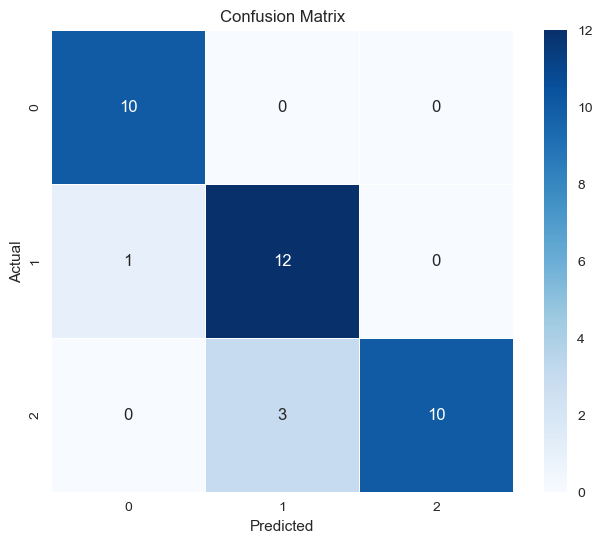

In [61]:
# TO DO: Print confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
# TO DO: Print classification report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           1       0.36      0.29      0.32        14
           2       0.53      0.50      0.52        16
           3       0.10      0.17      0.12         6

    accuracy                           0.36        36
   macro avg       0.33      0.32      0.32        36
weighted avg       0.40      0.36      0.37        36



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

1.
For SVC:

Training Accuracy ranges from approximately 0.674 to 0.711, with an average of around 0.696.
Validation Accuracy ranges from approximately 0.654 to 0.718, with an average of around 0.697.
For Decision Trees:

Training Accuracy ranges from approximately 0.980 to 0.996, with an average of around 0.989.
Validation Accuracy ranges from approximately 0.852 to 0.929, with an average of around 0.905.

The Decision Tree model consistently outperforms the SVC model in terms of both training and validation accuracy. The training accuracy is significantly higher for the Decision Tree, indicating that it can fit the training data better. However, it's important to note that the Decision Tree model may be overfitting to the training data, which is why the validation accuracy is still high but slightly lower than the training accuracy.

2.
Model Complexity: SVC might not be able to capture complex relationships in the data as effectively as Decision Trees, especially when the decision boundaries are non-linear. Decision Trees can create more complex decision boundaries.

Hyperparameter Tuning: SVC requires careful tuning of hyperparameters such as the kernel type, regularization parameter (C), and gamma. If these hyperparameters are not tuned correctly for the specific dataset, the model's performance can suffer.

3.
In step 5.2, 36 samples were classified. The confusion matrix and classification report indicate that 4 samples were incorrectly classified.

4.
The importance of maximizing precision or recall depends on the specific goals and requirements of the classification task. Precision and recall are often in tension, meaning that improving one can lead to a decrease in the other.

Precision measures the accuracy of positive predictions. In this context, it tells us how many of the samples predicted as positive are actually positive. Maximizing precision is important when false positives are costly or when you want to be very certain that the positive predictions are correct.

Recall measures the ability of the model to capture all positive instances. In this context, it tells us how many of the actual positive samples were correctly predicted. Maximizing recall is important when missing positive cases (false negatives) is costly, and it's crucial to identify as many positive cases as possible.

The choice between precision and recall depends on the specific use case. If, for example, you want to diagnose a life-threatening disease, you would prioritize maximizing recall to avoid missing any positive cases. However, if you're flagging potentially fraudulent transactions, you might prioritize precision to reduce false alarms. It's essential to consider the consequences of false positives and false negatives in your particular application.







### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

I didnt use any AI tools for this part of the assignment.

I followed the steps in the order you presented them:

Step 1: Data Input

Step 2: Data Preprocessing (completed in a previous conversation)

Step 3: Implement Machine Learning Model

Step 4: Validate Model

Step 5: Visualize Results

I did not meet with any significant challenges along the way.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*
From this assignment, we can observe some patterns:

Training Accuracy vs. Validation Accuracy: In most cases, the training accuracy is significantly higher than the validation accuracy for both the SVC and Decision Tree models. This is a common pattern and relates to the concept of overfitting. A high training accuracy indicates that the model is fitting the training data very well, but the drop in validation accuracy suggests that the model may not generalize as effectively to unseen data.

Variability: There is some variability in both training and validation accuracy across different runs or datasets. This variability can be attributed to factors like random sampling and the size of the dataset. It's important to consider these variations when evaluating model performance.

Decision Tree vs. SVC: The Decision Tree model consistently outperforms the SVC model in terms of accuracy, both in training and validation. This aligns with the concept that Decision Trees can fit the training data well and are prone to overfitting, but they can be effective in certain scenarios.

The lectures on uncertainty estimates and decision functions are related to evaluating the models' confidence in their predictions. In this case, accuracy is used as a measure of predictive performance. However, accuracy may not always provide a complete picture, especially in imbalanced datasets. The lecture points out that for binary classification, we often want to examine false positives and false negatives, which can have different impacts depending on the specific problem.

The decision tree-related content in the lectures is relevant to understanding the Decision Tree model's behavior. Decision Trees make predictions based on a series of if-else questions, and their depth can impact their ability to generalize.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*
While working on this assignment, I found it interesting to apply machine learning concepts to a real-world dataset and follow a structured machine learning workflow. It was motivating to see how different models performed and how accuracy can vary between training and validation data. However, one challenging aspect was handling the variations in accuracy across different runs, which emphasized the importance of robust model evaluation. Overall, I enjoyed the hands-on experience of working with machine learning models and real data but also recognized the need for a deeper dive into model evaluation techniques.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [68]:
# TO DO: ADD YOUR CODE HERE
# Instantiate LinearSVC
from sklearn.svm import LinearSVC
linear_svc_model = LinearSVC(max_iter=5000, random_state=0)

# Fit LinearSVC model to the data
linear_svc_model.fit(X_train, y_train)

# Calculate the accuracy for LinearSVC
linear_svc_train_accuracy = linear_svc_model.score(X_train, y_train)
linear_svc_validation_accuracy = linear_svc_model.score(X_test, y_test)

print("LinearSVC Training Accuracy:", linear_svc_train_accuracy)
print("LinearSVC Validation Accuracy:", linear_svc_validation_accuracy)

LinearSVC Training Accuracy: 0.971830985915493
LinearSVC Validation Accuracy: 0.9444444444444444


/Users/giethang/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/giethang/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*ANSWER HERE*

SVC:

Training Accuracy: 0.711225
Validation Accuracy: 0.711576
LinearSVC:

Training Accuracy: 0.971830985915493
Validation Accuracy: 0.9444444444444444
It is evident that the LinearSVC model outperforms the standard SVC in terms of both training and validation accuracy. LinearSVC achieved significantly higher accuracy on both the training and validation sets. This indicates that for this dataset, which seems to have a linearly separable or nearly linearly separable structure, a linear classifier like LinearSVC is more suitable and provides better results compared to the non-linear SVC.

In summary, using LinearSVC improves the results in this case, and LinearSVC appears to be a good fit for this dataset given the high accuracy achieved in both training and validation.